In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the CSV file path and year for analysis
# If year, input only the year. If in general, input "ALL" with apostrophes
csv_file = '/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/nz_reviews_with_routes.csv'  
chosen_year = 'ALL'

reviews_df = pd.read_csv(csv_file)
reviews_df.head()

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False


In [3]:
from datetime import datetime

def parse_date(date_flown_str):
    return pd.to_datetime(date_flown_str, format='%Y-%m-%d')

# Apply the function to the 'date_flown' column
reviews_df['date'] = reviews_df['date'].apply(parse_date)

# Extract month and year
reviews_df['month'] = reviews_df['date'].dt.month_name()
reviews_df['year'] = reviews_df['date'].dt.year

# Display the updated dataframe
reviews_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True,August
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True,August
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True,August
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False,July
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False,July


In [4]:
# Apply the condition: if chosen_year is 'ALL', use the entire DataFrame; otherwise, filter for the chosen year
if chosen_year == 'ALL':
    year_reviews = reviews_df
else:
    year_reviews = reviews_df[reviews_df['year'] == chosen_year]

# Show the first few rows of the resulting DataFrame
year_reviews.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True,August
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True,August
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True,August
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False,July
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False,July


# OVERALL PERFORMANCE TRENDS

# What is the overall trend in customer ratings and sentiment throughout the year? Are there any noticeable peaks or drops?

In [5]:
# Count the total number of reviews for the chosen year
total_reviews = len(year_reviews)

# Display the result
print(f"Total reviews for {chosen_year}: {total_reviews}")

Total reviews for ALL: 560


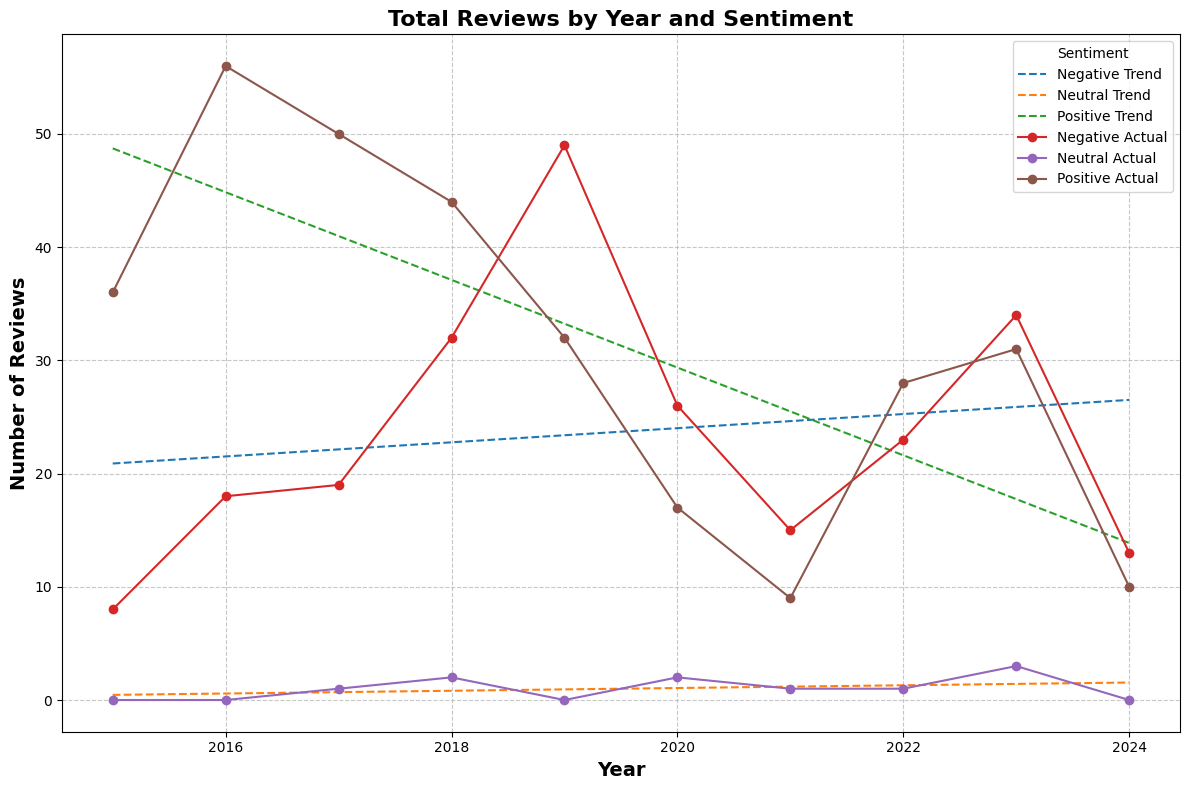

In [6]:
from sklearn.linear_model import LinearRegression

# If chosen_year is 'ALL', show yearly linear regression trends
if chosen_year == 'ALL':
    # Group by year and sentiment
    sentiment_by_year = reviews_df.groupby(['year', 'vader_sentiment']).size().unstack(fill_value=0)
    
    # Convert years to a numpy array for regression
    years = sentiment_by_year.index.values.reshape(-1, 1)
    
    plt.figure(figsize=(12, 8))

    # Perform linear regression for each sentiment category and plot the trend line
    for sentiment in sentiment_by_year.columns:
        counts = sentiment_by_year[sentiment].values
        model = LinearRegression().fit(years, counts)
        trend_line = model.predict(years)
        plt.plot(years, trend_line, label=f'{sentiment} Trend', linestyle='--')

    # Plot actual data points for each sentiment
    for sentiment in sentiment_by_year.columns:
        plt.plot(sentiment_by_year.index, sentiment_by_year[sentiment], marker='o', label=f'{sentiment} Actual')

    # Customize the plot
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
    plt.title('Total Reviews by Year and Sentiment', fontsize=16, fontweight='bold')
    plt.legend(title='Sentiment')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Else, show monthly sentiment analysis for the chosen year
else:
    # Filter the data for the chosen year
    year_reviews = reviews_df[reviews_df['year'] == chosen_year]
    
    # Replace NaN values in 'vader_sentiment' column with 0
    year_reviews['vader_sentiment'] = year_reviews['vader_sentiment'].fillna(0)
    
    # Group by month and sentiment, then count the number of reviews
    monthly_sentiment_counts = year_reviews.groupby(['month', 'vader_sentiment']).size().unstack(fill_value=0)
    
    # Sort months in the correct calendar order
    monthly_sentiment_counts = monthly_sentiment_counts.reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    
    # Replace any NaN in the final DataFrame with 0
    monthly_sentiment_counts = monthly_sentiment_counts.fillna(0)

    # Define color mapping for sentiments
    color_map = {
        'Negative': 'red',
        'Neutral': 'orange',
        'Positive': 'green'
    }

    plt.figure(figsize=(14, 8))

    # Plot each sentiment's monthly data
    for sentiment in monthly_sentiment_counts.columns:
        plt.plot(monthly_sentiment_counts.index, monthly_sentiment_counts[sentiment], 
                 marker='o', label=f'{sentiment}', color=color_map.get(sentiment, 'blue'))

    # Customize the plot
    plt.xlabel('Month', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
    plt.title(f'Total Reviews ({len(year_reviews)}) by Month and Sentiment for {chosen_year}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# RESULTS:

In [7]:
import numpy as np

# Updated function to handle both yearly and monthly sentiment data
def interpret_results(chosen_year, total_reviews, sentiment_data, is_yearly=True):
    if is_yearly:
        print(f"Analyzing customer sentiment trends across all years:")
        
        # Trend Analysis
        sentiment_trends = {}
        years = sentiment_data.index.values
        for sentiment in sentiment_data.columns:
            counts = sentiment_data[sentiment].values
            trend = np.polyfit(years.flatten(), counts, 1)[0]
            sentiment_trends[sentiment] = trend

            if sentiment_trends[sentiment] > 0:
                print(f"\n- {sentiment} sentiment shows an increasing trend over the years, reflecting improving customer sentiment or service quality.")
            elif sentiment_trends[sentiment] < 0:
                print(f"\n- {sentiment} sentiment shows a decreasing trend, suggesting areas where service might need improvement.")
            else:
                print(f"\n- {sentiment} sentiment remains relatively stable over time.")

        # Modify the percentage change calculation to avoid inf% results
        def calculate_percentage_change(data):
            percentage_changes = {}
            for sentiment in data.columns:
                previous_year_values = data[sentiment].shift(1)
                current_year_values = data[sentiment]
                
                # Avoid division by zero
                with np.errstate(divide='ignore', invalid='ignore'):
                    pct_change = np.where(previous_year_values == 0, np.nan, (current_year_values - previous_year_values) / previous_year_values * 100)
                
                # Convert NaN values to a more readable format
                percentage_changes[sentiment] = np.nanmean(pct_change)
            
            return percentage_changes

        # Call the modified function for percentage changes
        percentage_changes = calculate_percentage_change(sentiment_by_year)

        print("\nYearly percentage changes in sentiment:")
        for sentiment, change in percentage_changes.items():
            if np.isnan(change):
                print(f"- {sentiment}: No data for the previous year to calculate change.")
            else:
                print(f"- {sentiment}: {change:.2f}% change year-over-year")

        # Correlation Analysis
        correlation_matrix = sentiment_data.corr()
        print("\nCorrelation between different sentiments:")
        print(correlation_matrix)

        # Peak and Low Points Analysis
        max_sentiments = sentiment_data.max()
        min_sentiments = sentiment_data.min()
        print("\nYear with highest and lowest sentiment counts:")
        for sentiment in sentiment_data.columns:
            max_year = sentiment_data[sentiment].idxmax()
            min_year = sentiment_data[sentiment].idxmin()
            print(f"- {sentiment} sentiment peaked in {max_year} and was lowest in {min_year}")

        # Recommendations
        print("\nRecommendation: Focus on enhancing strategies in years with declining sentiments and replicate successful practices from years with rising positive sentiment.")

    else:
        print(f"Analyzing sentiment for the year {chosen_year}:")
        
        print(f"\n- Total reviews: A total of {total_reviews} reviews were submitted in {chosen_year}.")
        
        # Determine peak and lowest months
        total_reviews_per_month = sentiment_data.sum(axis=1)
        peak_month = total_reviews_per_month.idxmax()
        low_month = total_reviews_per_month.idxmin()
        
        if total_reviews_per_month[peak_month] > total_reviews_per_month.median():
            print(f"- Peak month for reviews: {peak_month} had the highest number of reviews, indicating high customer activity or engagement.")
        else:
            print(f"- Peak month for reviews: {peak_month} was within typical activity levels for the year.")

        print(f"- Lowest review month: {low_month} had the fewest reviews. This could indicate a slower travel period or less demand.")

        # Analyze sentiment trends across months
        if 'Positive' in sentiment_data.columns:
            pos_peak_month = sentiment_data['Positive'].idxmax()
            pos_low_month = sentiment_data['Positive'].idxmin()
            if sentiment_data['Positive'][pos_peak_month] > sentiment_data['Positive'].median():
                print(f"\n- Positive sentiment: The highest positive sentiment was recorded in {pos_peak_month}, indicating a period of high customer satisfaction.")
            else:
                print(f"\n- Positive sentiment: Positive reviews were spread out with {pos_peak_month} seeing a relatively higher number.")
            
            print(f"- Lowest positive sentiment: {pos_low_month} saw fewer positive reviews, which may warrant investigation into service quality during this month.")
        else:
            print(f"\n- Positive sentiment: There were no or very few positive reviews in {chosen_year}.")

        if 'Negative' in sentiment_data.columns:
            neg_peak_month = sentiment_data['Negative'].idxmax()
            neg_low_month = sentiment_data['Negative'].idxmin()
            if sentiment_data['Negative'][neg_peak_month] > sentiment_data['Negative'].median():
                print(f"\n- Negative sentiment: The peak in negative sentiment occurred in {neg_peak_month}. This suggests a challenging period for customer satisfaction.")
            else:
                print(f"\n- Negative sentiment: Negative feedback was relatively consistent, with {neg_peak_month} seeing a slight uptick.")
            
            print(f"- Lowest negative sentiment: {neg_low_month} had the least negative sentiment, indicating better customer experience during this time.")
        else:
            print(f"\n- Negative sentiment: Negative feedback was minimal or absent for {chosen_year}.")

        # Check if the year saw more positive or negative reviews overall
        total_positive = sentiment_data['Positive'].sum()
        total_negative = sentiment_data['Negative'].sum()
        
        if total_positive > total_negative:
            print(f"\n- Overall sentiment: {chosen_year} had a predominantly positive sentiment, with customers generally expressing satisfaction.")
        elif total_negative > total_positive:
            print(f"\n- Overall sentiment: {chosen_year} saw more negative sentiment, indicating that customers were more dissatisfied during this period.")
        else:
            print(f"\n- Overall sentiment: Sentiments were balanced, with nearly equal numbers of positive and negative reviews.")
        
        print("\nRecommendation: Investigate months with high negative sentiment to identify potential service issues. Also, replicate successful strategies from months with high positive sentiment.")

# Call the interpretation function based on the chosen year
if chosen_year == 'ALL':
    interpret_results(chosen_year, total_reviews, sentiment_by_year, is_yearly=True)
else:
    interpret_results(chosen_year, total_reviews, monthly_sentiment_counts, is_yearly=False)


Analyzing customer sentiment trends across all years:

- Negative sentiment shows an increasing trend over the years, reflecting improving customer sentiment or service quality.

- Neutral sentiment shows an increasing trend over the years, reflecting improving customer sentiment or service quality.

- Positive sentiment shows a decreasing trend, suggesting areas where service might need improvement.

Yearly percentage changes in sentiment:
- Negative: 22.47% change year-over-year
- Neutral: 8.33% change year-over-year
- Positive: 7.30% change year-over-year

Correlation between different sentiments:
vader_sentiment  Negative   Neutral  Positive
vader_sentiment                              
Negative         1.000000  0.331742  0.119988
Neutral          0.331742  1.000000 -0.072373
Positive         0.119988 -0.072373  1.000000

Year with highest and lowest sentiment counts:
- Negative sentiment peaked in 2019 and was lowest in 2015
- Neutral sentiment peaked in 2023 and was lowest in 20

# PERFORMANCE BY ROUTE

# How do domestic flights compare to international flights in terms of customer satisfaction and feedback?

In [8]:
# Identify the rating columns
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service', 'value_for_money',
                   'inflight_entertainment', 'wifi_&_connectivity']

# Group data by route type (Domestic/International) and calculate average ratings
average_ratings = year_reviews.groupby(['is_domestic'])[rating_columns].mean().reset_index()

# Display the average ratings for validation
average_ratings

,is_domestic,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,value_for_money,inflight_entertainment,wifi_&_connectivity
0,False,2.778027,2.991031,2.345291,2.773543,2.746637,2.609865,0.172646
1,True,2.605263,2.903509,1.210526,2.263158,2.377193,-0.105263,-0.298246


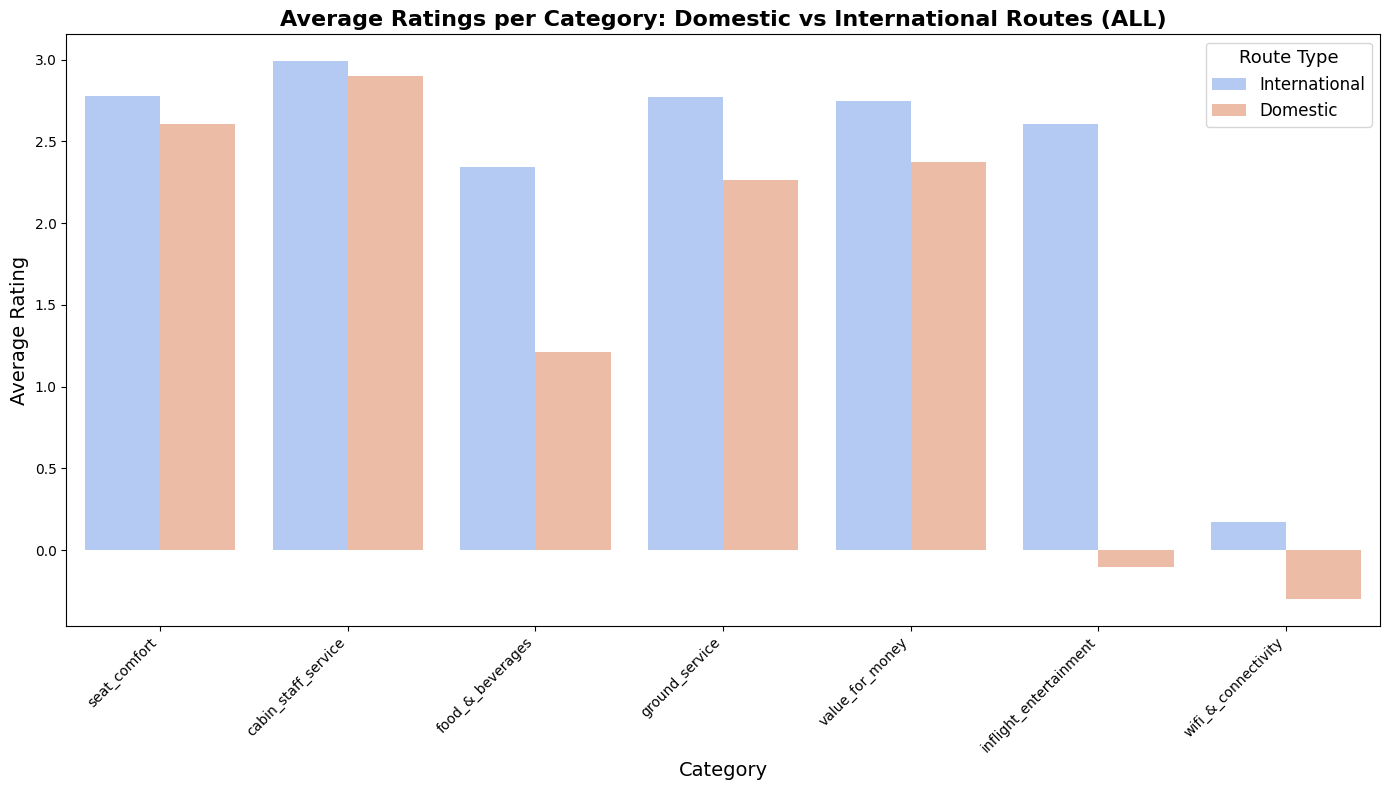

In [9]:
average_ratings_melted = average_ratings.melt(id_vars=['is_domestic'], 
                                              value_vars=rating_columns,
                                              var_name='category', 
                                              value_name='average_rating')

plt.figure(figsize=(14, 8))
sns.barplot(data=average_ratings_melted, x='category', y='average_rating', hue='is_domestic', palette='coolwarm')
plt.title(f'Average Ratings per Category: Domestic vs International Routes ({chosen_year})', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Domestic' if label == 'True' else 'International' for label in labels], 
           title='Route Type', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()


# RESULTS:

In [10]:
def interpret_route_performance(average_ratings):
    domestic_ratings = average_ratings[average_ratings['is_domestic'] == True]
    international_ratings = average_ratings[average_ratings['is_domestic'] == False]
    
    print(f"Analyzing customer satisfaction for domestic and international flights in {chosen_year}:")
    
    # Compare overall satisfaction
    domestic_overall_avg = domestic_ratings[rating_columns].mean().mean()
    international_overall_avg = international_ratings[rating_columns].mean().mean()

    if domestic_overall_avg > international_overall_avg:
        print(f"\n- Overall Satisfaction: Domestic flights received a higher average rating ({domestic_overall_avg:.2f}) compared to international flights ({international_overall_avg:.2f}). This suggests better customer satisfaction on domestic routes.")
    elif domestic_overall_avg < international_overall_avg:
        print(f"\n- Overall Satisfaction: International flights received a higher average rating ({international_overall_avg:.2f}) compared to domestic flights ({domestic_overall_avg:.2f}). This indicates higher customer satisfaction for international routes.")
    else:
        print(f"\n- Overall Satisfaction: Both domestic and international flights have similar average ratings, indicating similar levels of satisfaction across both types of routes.")

    # In-depth per category comparison
    for category in rating_columns:
        domestic_avg = domestic_ratings[category].mean()
        international_avg = international_ratings[category].mean()
        
        if domestic_avg > international_avg:
            print(f"- {category.replace('_', ' ').title()}: Domestic flights received higher ratings ({domestic_avg:.2f}) compared to international ({international_avg:.2f}).")
        elif domestic_avg < international_avg:
            print(f"- {category.replace('_', ' ').title()}: International flights received higher ratings ({international_avg:.2f}) compared to domestic ({domestic_avg:.2f}).")
        else:
            print(f"- {category.replace('_', ' ').title()}: Ratings are similar for both domestic and international flights ({domestic_avg:.2f}).")

    # Recommendations based on the results
    print("\nRecommendations: ")
    if domestic_overall_avg > international_overall_avg:
        print("- Focus on maintaining the strong performance of domestic flights. Investigate specific categories where international routes underperform to improve overall satisfaction.")
    elif international_overall_avg > domestic_overall_avg:
        print("- Leverage the strengths of international flights in areas such as customer service or comfort, while identifying opportunities for domestic route improvements.")
    else:
        print("- Since overall satisfaction is similar, ensure consistency in service quality across both domestic and international flights, while refining areas with lower category ratings.")

# Call the interpretation function to analyze the results
interpret_route_performance(average_ratings)


Analyzing customer satisfaction for domestic and international flights in ALL:

- Overall Satisfaction: International flights received a higher average rating (2.35) compared to domestic flights (1.57). This indicates higher customer satisfaction for international routes.
- Seat Comfort: International flights received higher ratings (2.78) compared to domestic (2.61).
- Cabin Staff Service: International flights received higher ratings (2.99) compared to domestic (2.90).
- Food & Beverages: International flights received higher ratings (2.35) compared to domestic (1.21).
- Ground Service: International flights received higher ratings (2.77) compared to domestic (2.26).
- Value For Money: International flights received higher ratings (2.75) compared to domestic (2.38).
- Inflight Entertainment: International flights received higher ratings (2.61) compared to domestic (-0.11).
- Wifi & Connectivity: International flights received higher ratings (0.17) compared to domestic (-0.30).

Recom

# CUSTOMER DEMOGRAPHICS

# Which type of traveler gives the highest/lowest ratings?

In [11]:
# Checking the unique types of travelers
year_reviews['type_of_traveller'].unique()

# Checking the distribution of ratings
year_reviews['rating'].describe()


count    560.000000
mean       4.800000
std        3.530496
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       10.000000
Name: rating, dtype: float64

In [12]:
# Grouping by type of traveller and calculating mean and median ratings
traveller_rating_summary = year_reviews.groupby('type_of_traveller')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sorting to find the highest and lowest mean ratings
traveller_rating_summary = traveller_rating_summary.sort_values(by='mean', ascending=False)

traveller_rating_summary

,type_of_traveller,mean,median,count
3,Solo Leisure,5.035000,4.0,200
1,Couple Leisure,4.901639,4.0,183
0,Business,4.630952,3.0,84
2,Family Leisure,4.247312,3.0,93


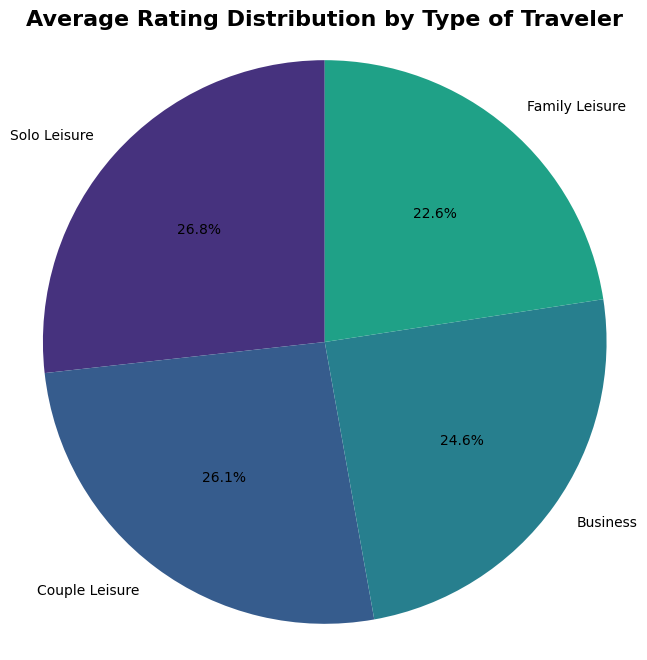

In [13]:
labels = traveller_rating_summary['type_of_traveller']
average_ratings = traveller_rating_summary['mean']

plt.figure(figsize=(8, 8))
plt.pie(average_ratings, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Average Rating Distribution by Type of Traveler', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
# Group by type of traveler and sentiment label
sentiment_distribution = year_reviews.groupby(['type_of_traveller', 'vader_sentiment']).size().unstack(fill_value=0)

sentiment_distribution

# Normalize to get percentage distribution
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

# Display the sentiment distribution as a percentage
sentiment_distribution_percentage

vader_sentiment,Negative,Neutral,Positive
type_of_traveller,,,
Business,0.392857,0.000000,0.607143
Couple Leisure,0.442623,0.016393,0.540984
Family Leisure,0.483871,0.032258,0.483871
Solo Leisure,0.390000,0.020000,0.590000


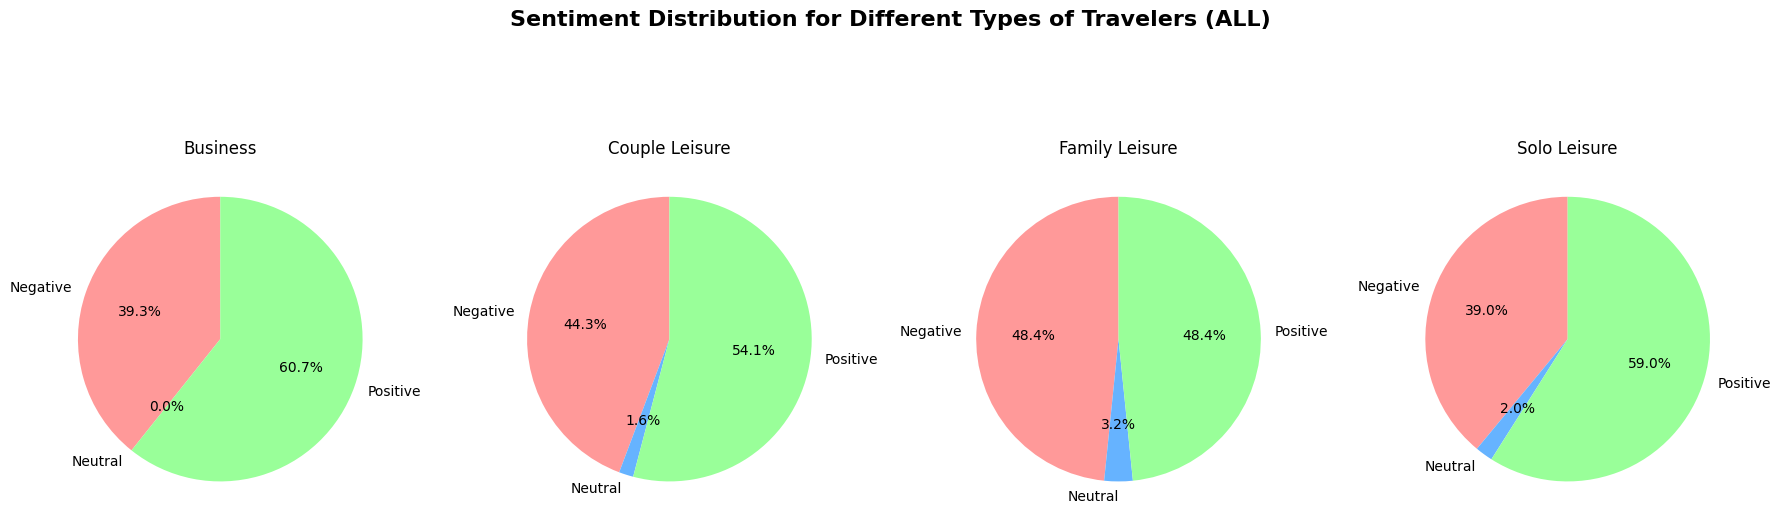

In [16]:
traveller_types = sentiment_distribution.index

fig, axes = plt.subplots(1, len(traveller_types), figsize=(18, 6))

colors = ['#ff9999','#66b3ff','#99ff99']

# Iterate through each type of traveler and create a pie chart
for i, traveller_type in enumerate(traveller_types):
    sentiments = sentiment_distribution.loc[traveller_type]
    
    axes[i].pie(sentiments, labels=sentiments.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    axes[i].set_title(traveller_type)

plt.tight_layout()
plt.suptitle(f'Sentiment Distribution for Different Types of Travelers ({chosen_year})', y=1.05, fontsize=16, fontweight='bold')
plt.show()


# RESULTS:

In [17]:
# INTERPRETATION OF RESULTS: TRAVELER TYPE AND SENTIMENT ANALYSIS

def interpret_traveller_performance(traveller_rating_summary, sentiment_distribution_percentage):
    print(f"Traveler Type Analysis ({chosen_year})")
    
    # Analyzing overall rating by type of traveler
    highest_rated = traveller_rating_summary.iloc[0]
    lowest_rated = traveller_rating_summary.iloc[-1]

    print(f"\n- Highest Rated Traveler Type: {highest_rated['type_of_traveller']} with an average rating of {highest_rated['mean']:.2f}.")
    print(f"  This traveler type seems to have the most satisfaction on average, with {highest_rated['count']} reviews.")
    
    print(f"\n- Lowest Rated Traveler Type: {lowest_rated['type_of_traveller']} with an average rating of {lowest_rated['mean']:.2f}.")
    print(f"  This indicates that this group may be less satisfied compared to others, with {lowest_rated['count']} reviews.")

    # Additional insights from median rating
    print(f"\n- Median Ratings: ")
    for i, row in traveller_rating_summary.iterrows():
        print(f"  - {row['type_of_traveller']} has a median rating of {row['median']}.")

    # Analyze sentiment distribution by traveler type
    print(f"\nSentiment Analysis by Traveler Type")
    
    for traveller_type in sentiment_distribution_percentage.index:
        sentiment = sentiment_distribution_percentage.loc[traveller_type]
        
        # Identify which sentiment dominates for each traveler type
        dominant_sentiment = sentiment.idxmax()
        dominant_percentage = sentiment.max() * 100
        
        print(f"\n- {traveller_type}: ")
        print(f"  - Dominant Sentiment: {dominant_sentiment} ({dominant_percentage:.1f}% of total reviews)")
        
        # Analyze balance across sentiments
        positive_percentage = sentiment['Positive'] * 100 if 'Positive' in sentiment else 0
        neutral_percentage = sentiment['Neutral'] * 100 if 'Neutral' in sentiment else 0
        negative_percentage = sentiment['Negative'] * 100 if 'Negative' in sentiment else 0
        
        print(f"  - Sentiment Breakdown:")
        print(f"    - Positive: {positive_percentage:.1f}%")
        print(f"    - Neutral: {neutral_percentage:.1f}%")
        print(f"    - Negative: {negative_percentage:.1f}%")
        
        # Specific recommendations based on sentiment analysis
        if dominant_sentiment == 'Negative':
            print(f"  - Recommendation: Focus on improving the experience for {traveller_type} travelers, as negative sentiment is the most prevalent.")
        elif dominant_sentiment == 'Neutral':
            print(f"  - Recommendation: Consider investigating why {traveller_type} travelers are neither fully satisfied nor dissatisfied, focusing on enhancing the positive aspects of their experience.")
        else:
            print(f"  - Recommendation: Maintain the high satisfaction levels for {traveller_type} travelers, but still look for opportunities to reduce any neutral or negative experiences.")

# Call the interpretation function to analyze the results
interpret_traveller_performance(traveller_rating_summary, sentiment_distribution_percentage)


Traveler Type Analysis (ALL)

- Highest Rated Traveler Type: Solo Leisure with an average rating of 5.04.
  This traveler type seems to have the most satisfaction on average, with 200 reviews.

- Lowest Rated Traveler Type: Family Leisure with an average rating of 4.25.
  This indicates that this group may be less satisfied compared to others, with 93 reviews.

- Median Ratings: 
  - Solo Leisure has a median rating of 4.0.
  - Couple Leisure has a median rating of 4.0.
  - Business has a median rating of 3.0.
  - Family Leisure has a median rating of 3.0.

Sentiment Analysis by Traveler Type

- Business: 
  - Dominant Sentiment: Positive (60.7% of total reviews)
  - Sentiment Breakdown:
    - Positive: 60.7%
    - Neutral: 0.0%
    - Negative: 39.3%
  - Recommendation: Maintain the high satisfaction levels for Business travelers, but still look for opportunities to reduce any neutral or negative experiences.

- Couple Leisure: 
  - Dominant Sentiment: Positive (54.1% of total reviews)

# How do ratings vary by Seat Type (e.g. Economy, Business)?

In [18]:
# Group by seat type and calculate rating statistics
seat_rating_summary = year_reviews.groupby('seat_type')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sort the values to see which seat types have the highest/lowest ratings
seat_rating_summary = seat_rating_summary.sort_values(by='mean', ascending=False)

# Display the summary
seat_rating_summary


,seat_type,mean,median,count
0,Business Class,6.697674,8.0,86
2,Premium Economy,5.957447,8.0,47
1,Economy Class,4.290398,3.0,427


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7442/300095252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')


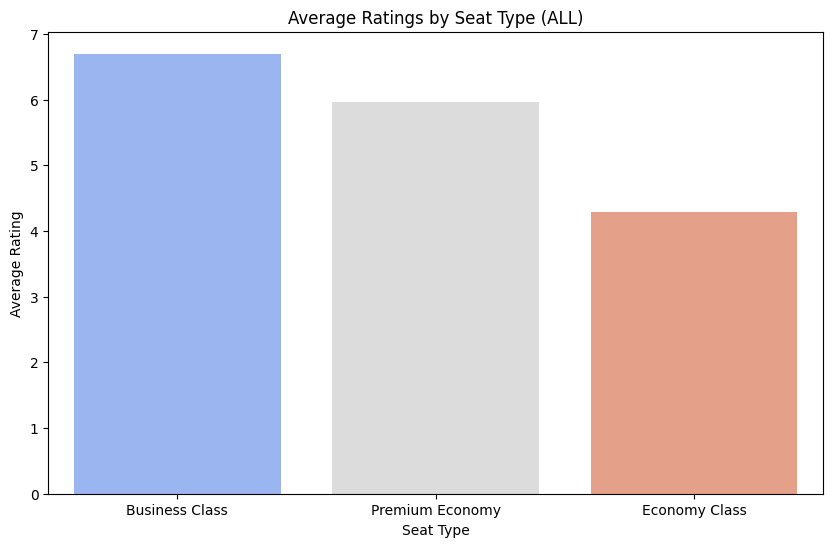

In [19]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the mean ratings by seat type
sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')

# Add labels and title
plt.title(f'Average Ratings by Seat Type ({chosen_year})')
plt.xlabel('Seat Type')
plt.ylabel('Average Rating')

# Display the plot
plt.show()


# RESULTS:

In [20]:
# INTERPRETATION OF RESULTS: SEAT TYPE AND RATING ANALYSIS

def interpret_seat_type_performance(seat_rating_summary):
    print(f"Seat Type Analysis ({chosen_year})")
    
    # Analyzing overall rating by seat type
    highest_rated = seat_rating_summary.iloc[0]
    lowest_rated = seat_rating_summary.iloc[-1]

    print(f"\n- Highest Rated Seat Type: {highest_rated['seat_type']} with an average rating of {highest_rated['mean']:.2f}.")
    print(f"  This seat type seems to offer the most satisfaction on average, with {highest_rated['count']} reviews.")
    
    print(f"\n- Lowest Rated Seat Type: {lowest_rated['seat_type']} with an average rating of {lowest_rated['mean']:.2f}.")
    print(f"  This indicates that this seat type may be less satisfying compared to others, with {lowest_rated['count']} reviews.")

    # Additional insights from median rating
    print(f"\n- Median Ratings: ")
    for i, row in seat_rating_summary.iterrows():
        print(f"  - {row['seat_type']} has a median rating of {row['median']}.")

    # Analyze the distribution of ratings for each seat type
    print(f"\nDetailed Analysis:")
    for i, row in seat_rating_summary.iterrows():
        seat_type = row['seat_type']
        mean_rating = row['mean']
        median_rating = row['median']
        count_reviews = row['count']

        print(f"\n- Seat Type: {seat_type}")
        print(f"  - Mean Rating: {mean_rating:.2f}")
        print(f"  - Median Rating: {median_rating:.2f}")
        print(f"  - Number of Reviews: {count_reviews}")

        # Provide recommendations based on the ratings
        if mean_rating < 3:
            print(f"  - Recommendation: Improve the features or comfort of {seat_type} seats to enhance customer satisfaction.")
        elif mean_rating >= 3 and mean_rating < 4:
            print(f"  - Recommendation: {seat_type} seats are acceptable, but consider making incremental improvements to boost satisfaction.")
        else:
            print(f"  - Recommendation: Continue to maintain and possibly enhance the {seat_type} seat experience, as it is highly rated.")

# Call the interpretation function to analyze the results
interpret_seat_type_performance(seat_rating_summary)


Seat Type Analysis (ALL)

- Highest Rated Seat Type: Business Class with an average rating of 6.70.
  This seat type seems to offer the most satisfaction on average, with 86 reviews.

- Lowest Rated Seat Type: Economy Class with an average rating of 4.29.
  This indicates that this seat type may be less satisfying compared to others, with 427 reviews.

- Median Ratings: 
  - Business Class has a median rating of 8.0.
  - Premium Economy has a median rating of 8.0.
  - Economy Class has a median rating of 3.0.

Detailed Analysis:

- Seat Type: Business Class
  - Mean Rating: 6.70
  - Median Rating: 8.00
  - Number of Reviews: 86
  - Recommendation: Continue to maintain and possibly enhance the Business Class seat experience, as it is highly rated.

- Seat Type: Premium Economy
  - Mean Rating: 5.96
  - Median Rating: 8.00
  - Number of Reviews: 47
  - Recommendation: Continue to maintain and possibly enhance the Premium Economy seat experience, as it is highly rated.

- Seat Type: Econo

# SENTIMENT ANALYSIS

# What key themes emerge from Air New Zealand's customer reviews across different sentiments?

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
import re

In [22]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
# Common words to exclude from analysis
excluded_terms = ["air_new_zealand", "flight", "auckland", "christchurch", "wellington", 
                  "new", "zealand", "air", "nz", "even_though", "via", "av", "sec", "could"]

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Function to generate exactly 3-word n-grams and join words with underscores
def generate_ngrams(text, n=3):
    words = text.split()
    # Generate only 4-word n-grams
    ngrams_list = ["_".join(ngram) for ngram in ngrams(words, n)]
    return ngrams_list


# Function to get top N n-grams while excluding certain terms
def get_top_n_ngrams(sentiment_reviews, n=20):
    all_ngrams = []
    for review in sentiment_reviews:
        all_ngrams.extend(generate_ngrams(review)) 
    
    # Remove excluded terms
    filtered_ngrams = [ngram for ngram in all_ngrams if all(term not in ngram for term in excluded_terms)]
    
    # Count frequencies of remaining n-grams
    ngram_freq = Counter(filtered_ngrams)
    return ngram_freq.most_common(n)

# Preprocess the reviews
year_reviews['cleaned_review'] = year_reviews['review_content'].apply(preprocess_text)

In [24]:
# Get the top 20 n-grams for each sentiment
positive_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Positive']['cleaned_review']
negative_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Negative']['cleaned_review']
neutral_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Neutral']['cleaned_review']

top_positive_ngrams = get_top_n_ngrams(positive_reviews, 20)
top_negative_ngrams = get_top_n_ngrams(negative_reviews, 20)
top_neutral_ngrams = get_top_n_ngrams(neutral_reviews, 10)


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7442/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


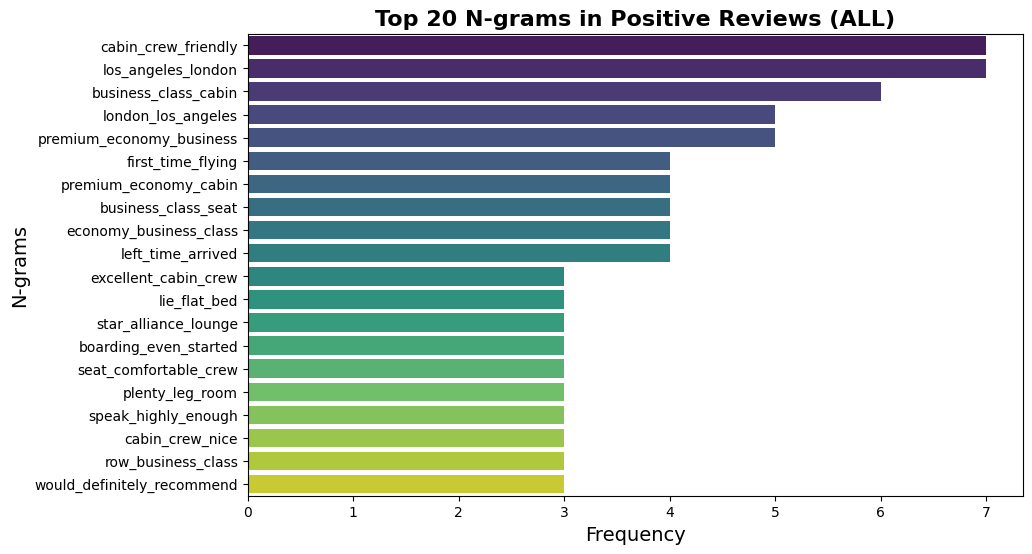

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7442/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


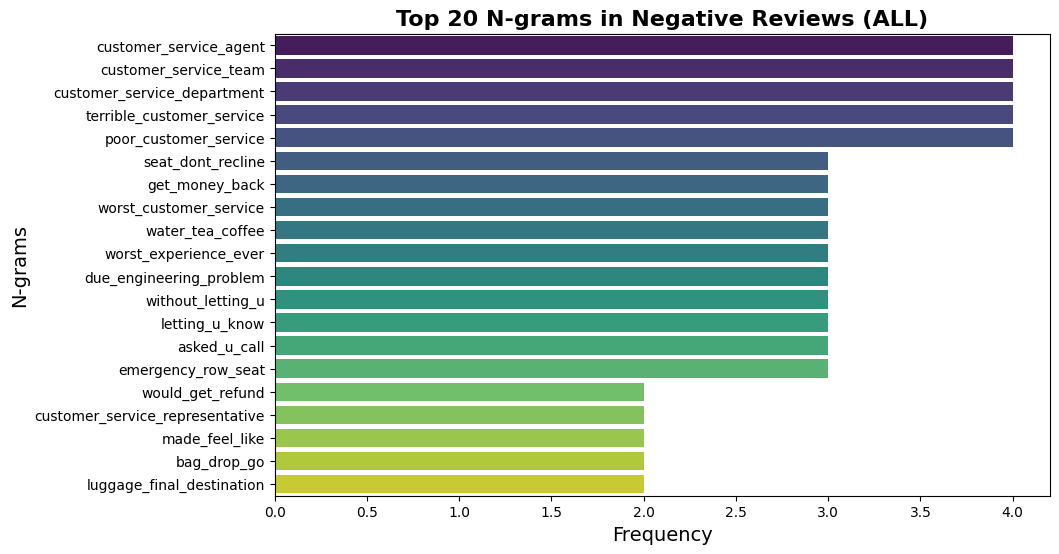

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7442/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


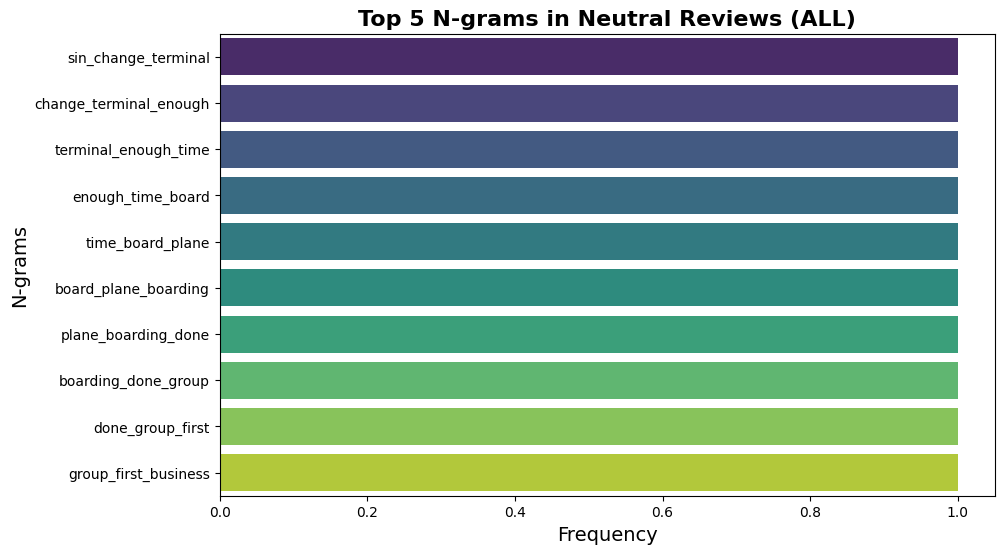

In [25]:
# Function to plot the n-gram frequencies
def plot_ngram_frequencies(ngram_freq, title):
    if not ngram_freq:  # Check if the n-gram list is empty
        print(f"No n-grams to plot for {title}.")
        return
    
    ngrams, frequencies = zip(*ngram_freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('N-grams', fontsize=14)
    plt.show()

# Plot the n-gram frequencies for each sentiment, checking if they exist
plot_ngram_frequencies(top_positive_ngrams, f'Top 20 N-grams in Positive Reviews ({chosen_year})')
plot_ngram_frequencies(top_negative_ngrams, f'Top 20 N-grams in Negative Reviews ({chosen_year})')
plot_ngram_frequencies(top_neutral_ngrams, f'Top 5 N-grams in Neutral Reviews ({chosen_year})')


In [26]:
from PIL import Image
from wordcloud import WordCloud
import numpy as np

In [27]:
# Load the airplane mask image
mask = np.array(Image.open('/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airplane-vector-36294843 copy.jpg'))

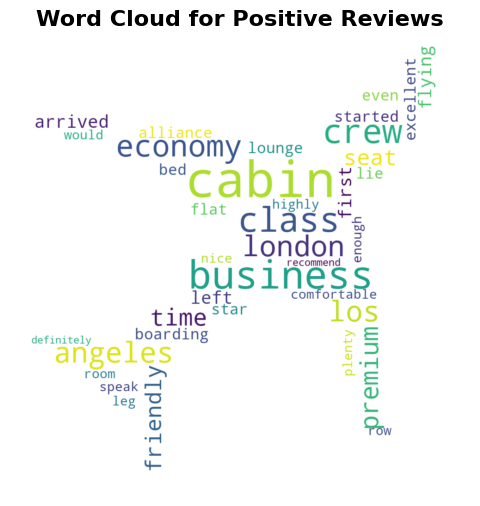

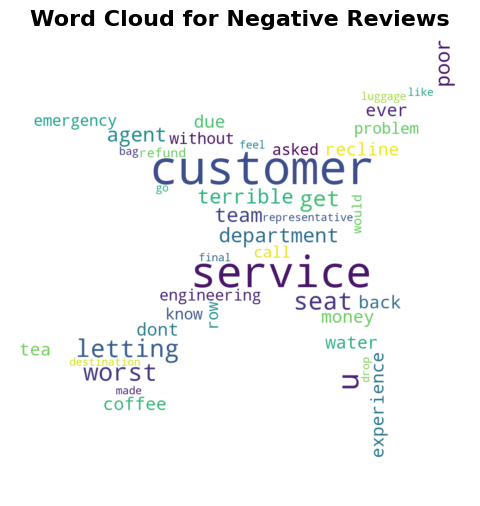

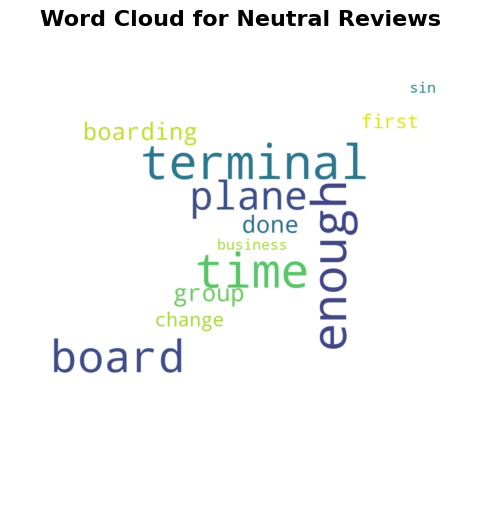

In [28]:
def preprocess_ngrams(ngram_freq):
    # Split multi-word n-grams into individual words
    word_list = []
    for ngram, freq in ngram_freq.items():
        words = ngram.split('_')
        word_list.extend(words * freq)
    return Counter(word_list)

def plot_wordcloud(ngram_freq, title, mask):
    if not ngram_freq:  
        print(f"No n-grams to plot for {title}.")
        return
    
    # Preprocess n-grams to individual words
    word_freq_dict = preprocess_ngrams(ngram_freq)
    
    # Create and generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', mask=mask).generate_from_frequencies(word_freq_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Plot the word clouds for each sentiment, checking if they exist
plot_wordcloud(dict(top_positive_ngrams), 'Word Cloud for Positive Reviews', mask)
plot_wordcloud(dict(top_negative_ngrams), 'Word Cloud for Negative Reviews', mask)
plot_wordcloud(dict(top_neutral_ngrams), 'Word Cloud for Neutral Reviews', mask)


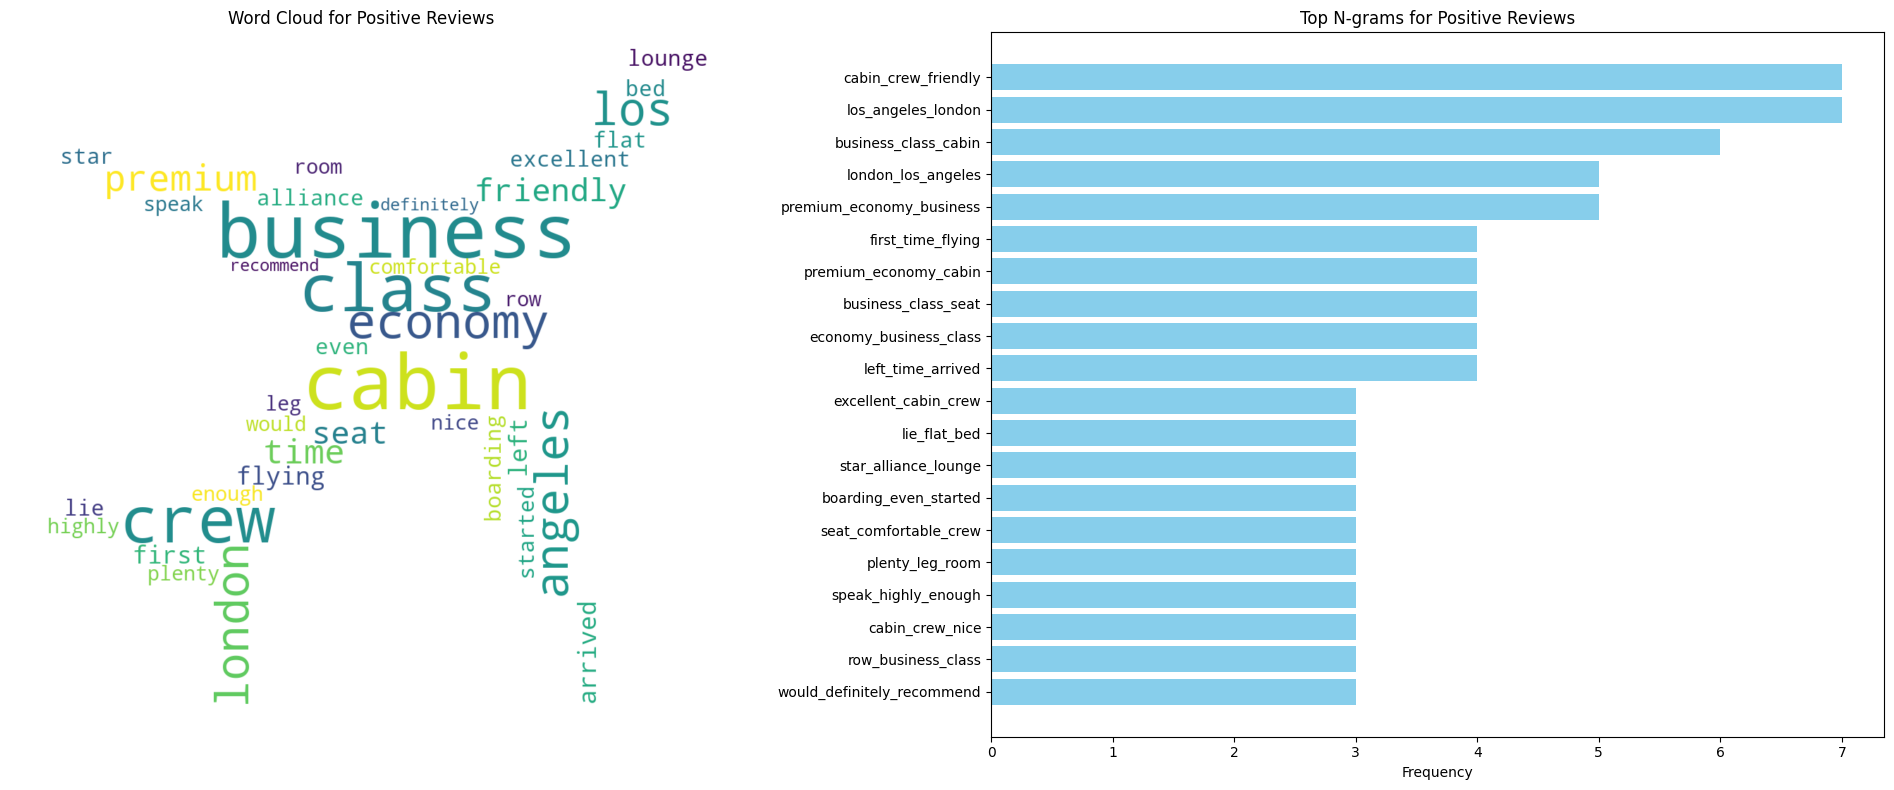

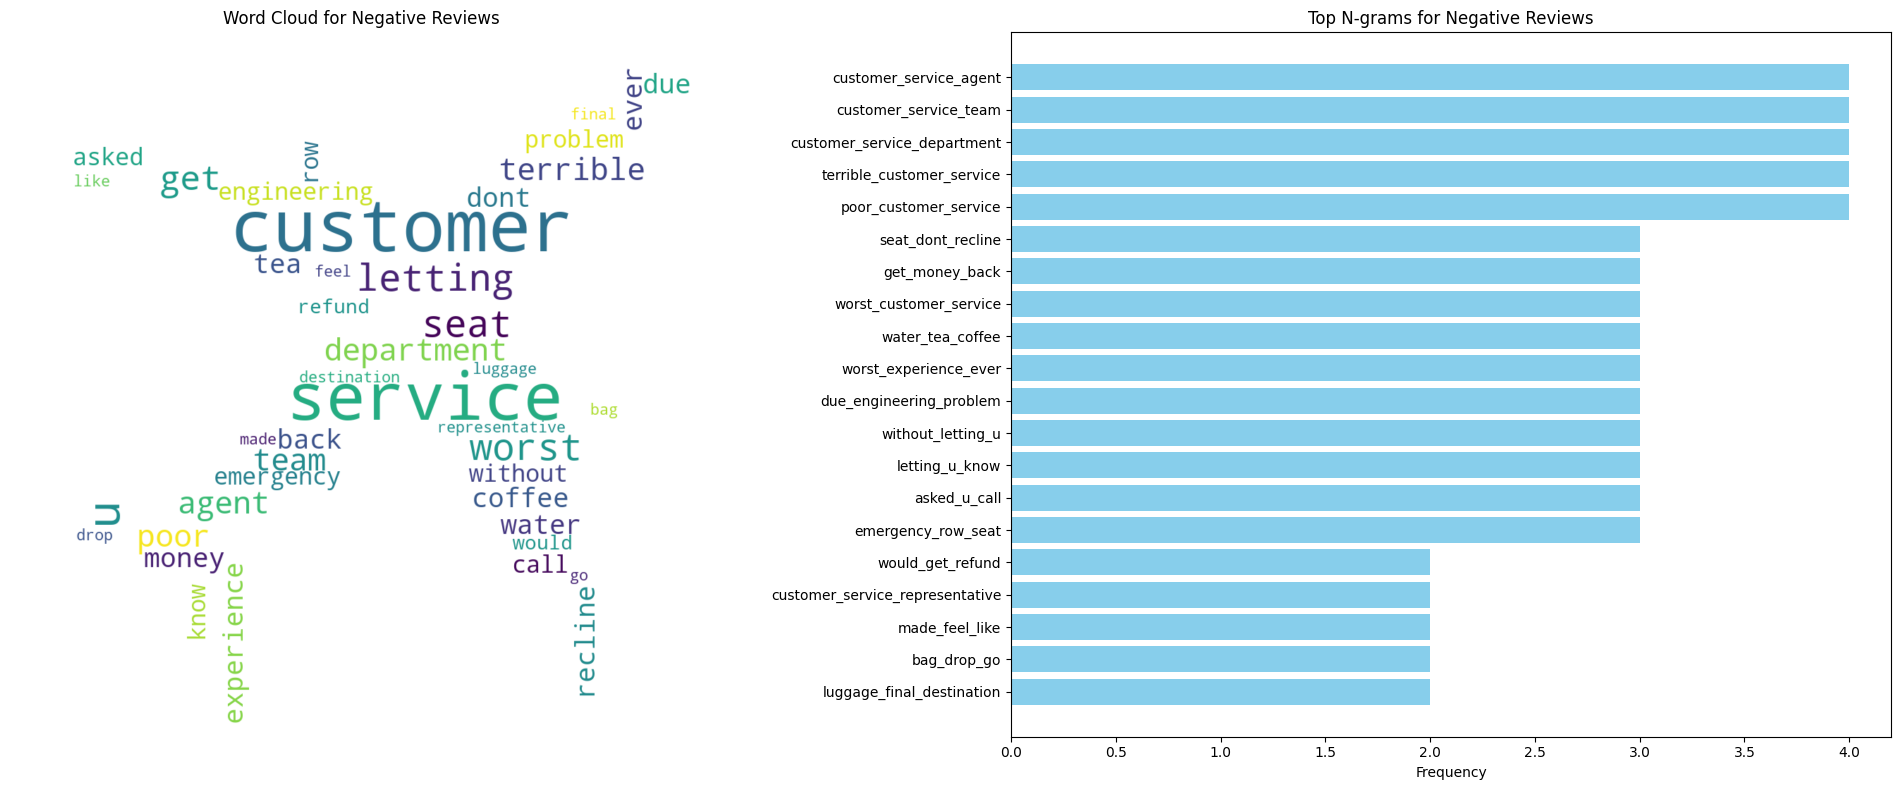

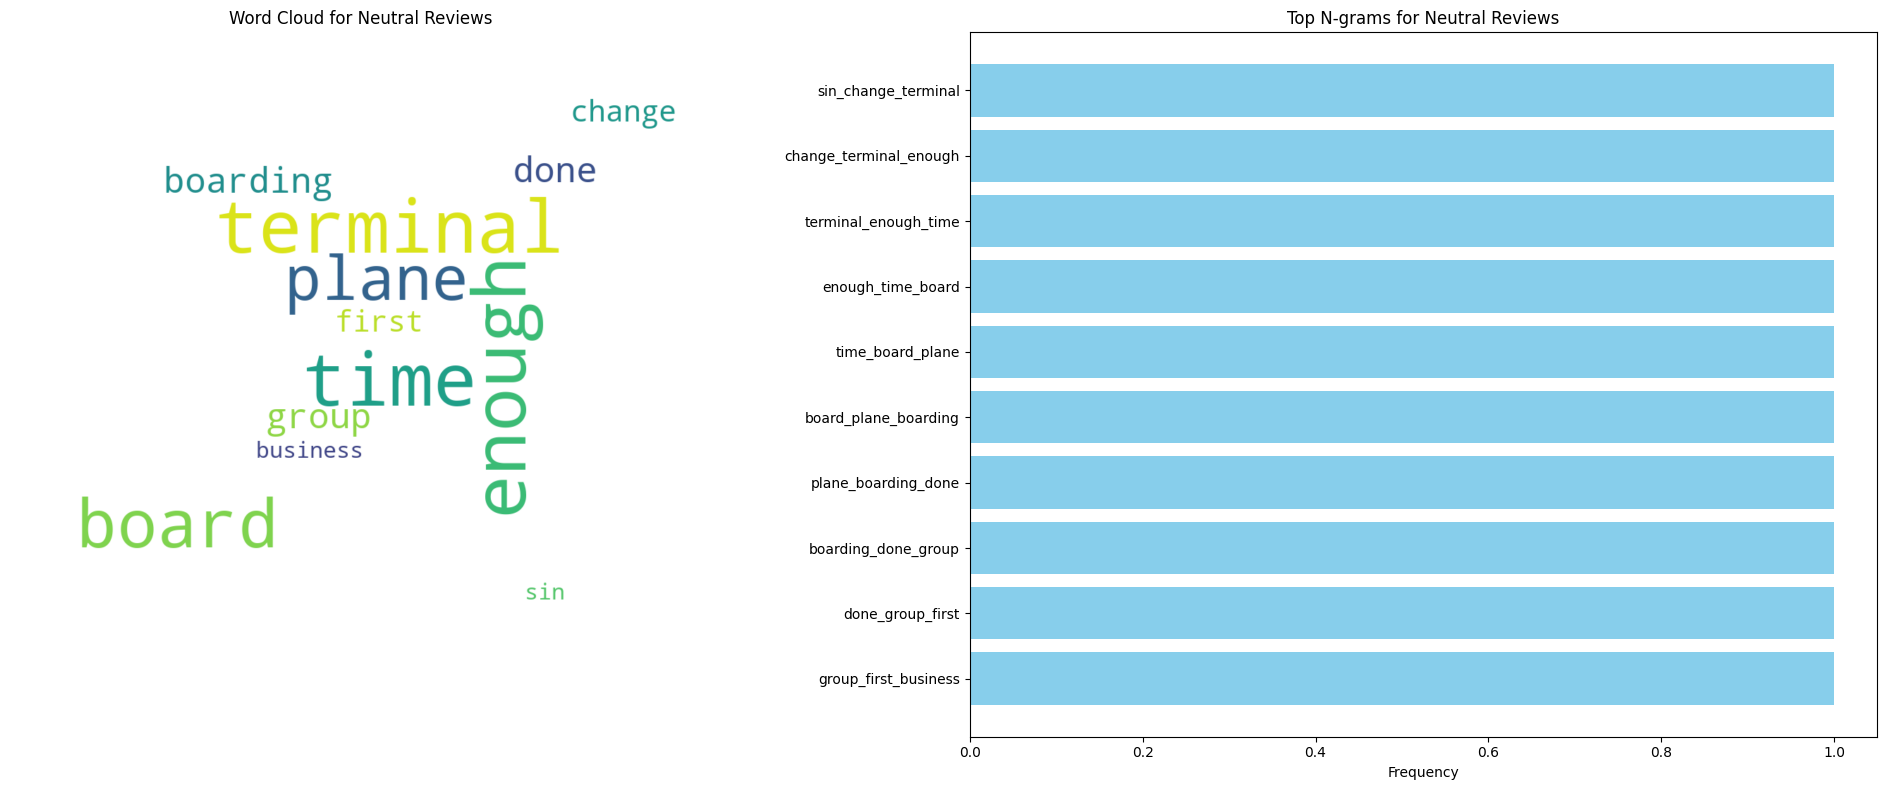

In [30]:
# Function to generate n-grams
def generate_ngrams(text, n=3):
    words = text.split()
    ngrams_list = ["_".join(ngram) for ngram in ngrams(words, n)]
    return ngrams_list

# Function to get top N n-grams while excluding certain terms
def get_top_n_ngrams(sentiment_reviews, n=20):
    all_ngrams = []
    for review in sentiment_reviews:
        all_ngrams.extend(generate_ngrams(review)) 
    
    # Remove excluded terms
    filtered_ngrams = [ngram for ngram in all_ngrams if all(term not in ngram for term in excluded_terms)]
    
    # Count frequencies of remaining n-grams
    ngram_freq = Counter(filtered_ngrams)
    return ngram_freq.most_common(n)

# Preprocess the reviews
year_reviews['cleaned_review'] = year_reviews['review_content'].apply(preprocess_text)

# Get the top n-grams for each sentiment
positive_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Positive']['cleaned_review']
negative_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Negative']['cleaned_review']
neutral_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Neutral']['cleaned_review']

top_positive_ngrams = get_top_n_ngrams(positive_reviews, 20)
top_negative_ngrams = get_top_n_ngrams(negative_reviews, 20)
top_neutral_ngrams = get_top_n_ngrams(neutral_reviews, 10)

# Load the airplane mask image
mask = np.array(Image.open('/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airplane-vector-36294843 copy.jpg'))

def preprocess_ngrams(ngram_freq):
    word_list = []
    for ngram, freq in ngram_freq:
        words = ngram.split('_')
        word_list.extend(words * freq)
    return Counter(word_list)

def plot_wordcloud(ngram_freq, title, mask, ax):
    if not ngram_freq:  
        ax.set_title(f'Word Cloud for {title}')
        ax.axis('off')  # Hide axis if no n-grams
        return
    
    # Preprocess n-grams to individual words
    word_freq_dict = preprocess_ngrams(ngram_freq)
    
    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask).generate_from_frequencies(word_freq_dict)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide axes
    ax.set_title(f'Word Cloud for {title}')

def plot_ngrams(ngram_freq, title, ax):
    if not ngram_freq:
        ax.set_title(f'Top N-grams for {title}')
        ax.axis('off')  # Hide axis if no n-grams
        return
    
    ngrams, counts = zip(*ngram_freq)
    ax.barh(ngrams, counts, color='skyblue')
    ax.set_title(f'Top N-grams for {title}')
    ax.invert_yaxis()  # Invert y-axis to have the highest count on top
    ax.set_xlabel('Frequency')

# Plotting for Positive Reviews
if top_positive_ngrams:
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    plot_wordcloud(top_positive_ngrams, 'Positive Reviews', mask, axes[0])
    plot_ngrams(top_positive_ngrams, 'Positive Reviews', axes[1])  # Only show if there are n-grams
    plt.tight_layout()
    plt.show()  # Show after Positive Reviews plots

# Plotting for Negative Reviews
if top_negative_ngrams:  # Only show if there are n-grams
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    plot_wordcloud(top_negative_ngrams, 'Negative Reviews', mask, axes[0])
    plot_ngrams(top_negative_ngrams, 'Negative Reviews', axes[1])
    plt.tight_layout()
    plt.show()  # Show after Negative Reviews plots

# Plotting for Neutral Reviews
if top_neutral_ngrams:  # Only show if there are n-grams
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    plot_wordcloud(top_neutral_ngrams, 'Neutral Reviews', mask, axes[0])
    plot_ngrams(top_neutral_ngrams, 'Neutral Reviews', axes[1])
    plt.tight_layout()
    plt.show()  # Show after Neutral Reviews plots


# RESULTS:

In [80]:
def extract_insights(ngram_freq, sentiment):
    insights = []
    for ngram, freq in ngram_freq:
        if sentiment == 'positive':
            insights.append(f"Positive aspect: {ngram.replace('_', ' ')} appears frequently ({freq} times).")
        elif sentiment == 'negative':
            insights.append(f"Negative aspect: {ngram.replace('_', ' ')} appears frequently ({freq} times).")
        elif sentiment == 'neutral':
            insights.append(f"Neutral aspect: {ngram.replace('_', ' ')} appears frequently ({freq} times).")
    return insights

# Generate insights for each sentiment
positive_insights = extract_insights(top_positive_ngrams, 'positive')
negative_insights = extract_insights(top_negative_ngrams, 'negative')
neutral_insights = extract_insights(top_neutral_ngrams, 'neutral')

def generate_recommendations(positive_insights, negative_insights):
    recommendations = []

    # Helper function to extract key terms
    def extract_key_terms(insights):
        terms = []
        for insight in insights:
            terms.extend(insight.split(': ')[1].split())
        return set(terms)
    
    # Analyze positive insights
    if positive_insights:
        positive_terms = extract_key_terms(positive_insights)
        recommendations.append("Strengths identified: " + ", ".join(positive_terms))
    
    # Analyze negative insights
    if negative_insights:
        negative_terms = extract_key_terms(negative_insights)
        recommendations.append("Areas for improvement: " + ", ".join(negative_terms))

        # Detailed recommendations based on specific feedback
        if any(term in negative_terms for term in ['seat', 'comfort', 'legroom']):
            recommendations.append("Evaluate and upgrade seat comfort and legroom. Gather feedback on seat adjustments and consider ergonomic improvements to enhance passenger comfort.")

        if any(term in negative_terms for term in ['crew', 'cabin', 'support']):
            recommendations.append("Enhance customer service training for cabin staff. Focus on improving responsiveness, friendliness, and problem-solving skills to elevate overall service quality.")

        if any(term in negative_terms for term in ['food', 'beverage', 'quality']):
            recommendations.append("Revise the in-flight food and beverage offerings. Aim to improve the quality and variety of meals, and consider customer preferences for healthier and diverse options.")

        if any(term in negative_terms for term in ['check-in', 'ground', 'customer', 'service']):
            recommendations.append("Enhance ground service operations. Improve efficiency in check-in processes, baggage handling, and customer support at the airport.")

        if any(term in negative_terms for term in ['value', 'price', 'cost']):
            recommendations.append("Reevaluate pricing strategies and enhance perceived value for money. Ensure that the quality of services justifies the cost and consider offering better value through promotions or loyalty programs.")

        if any(term in negative_terms for term in ['entertainment', 'movie', 'tv']):
            recommendations.append("Upgrade inflight entertainment options. Increase the variety of movies, TV shows, and other entertainment features to meet diverse customer interests.")

        if any(term in negative_terms for term in ['wifi', 'connectivity', 'internet']):
            recommendations.append("Improve WiFi and connectivity services. Ensure reliable and high-speed internet access and address any connectivity issues promptly.")

    return recommendations

# Generate recommendations based on insights
recommendations = generate_recommendations(positive_insights, negative_insights)

# Print recommendations
print("\nActionable Recommendations: ")
for rec in recommendations:
    print(f"- {rec}")




Actionable Recommendations: 
- Strengths identified: first, business, lounge, (7, left, appears, crew, economy, flat, bed, class, cabin, (6, (5, plenty, seat, friendly, lie, arrived, star, definitely, recommend, frequently, (3, even, boarding, angeles, flying, premium, started, speak, nice, time, los, would, alliance, (4, excellent, row, comfortable, times)., highly, enough, room, leg, london
- Areas for improvement: coffee, representative, dont, due, engineering, emergency, problem, letting, appears, experience, get, luggage, asked, seat, drop, money, like, terrible, tea, team, frequently, call, customer, recline, back, without, refund, (3, made, bag, department, final, water, ever, u, go, would, poor, (4, row, agent, times)., worst, know, (2, feel, destination, service
- Evaluate and upgrade seat comfort and legroom. Gather feedback on seat adjustments and consider ergonomic improvements to enhance passenger comfort.
- Enhance ground service operations. Improve efficiency in check-i

# PERFORMANCE BY ROUTE

# How do customer sentiments vary across different regions and flight routes?

In [81]:
# Mapping vader_sentiment to numerical values
sentiment_mapping = {'Negative': -1.0, 'Neutral': 0.0, 'Positive': 1.0}
year_reviews['vader_sentiment_numeric'] = year_reviews['vader_sentiment'].map(sentiment_mapping)
year_reviews

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month,cleaned_review,vader_sentiment_numeric
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,2024,auckland,NZ,queenstown,NZ,NaN,True,August,honestly quite surprised air new zealand take ...,1.0
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,2024,auckland,NZ,napier,NZ,NaN,True,August,air new zealand domestic service getting worse...,-1.0
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,2024,napier,NZ,auckland,NZ,NaN,True,August,air new zealand bumped u flight time made u ad...,-1.0
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2024,san francisco,US,queenstown,NZ,Auckland,False,July,unfortunately service care quality airline goi...,-1.0
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,2024,auckland,NZ,hobart,AU,NaN,False,July,checkin efficient boarding departure late seem...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2015-07-14,Air New Zealand customer review,4,Boeing 777,Solo Leisure,Economy Class,London to Los Angeles,June 2015,1.0,2.0,...,2015,london,US,los angeles,US,NaN,False,July,time since used airline hesitation bad experie...,1.0
556,2015-07-03,Air New Zealand customer review,4,B777-300,Business,Economy Class,Auckland to LAX,June 2015,2.0,4.0,...,2015,auckland,NZ,lax,US,NaN,False,July,five return trip nz n america usually one euro...,1.0
557,2015-06-29,Air New Zealand customer review,10,Boeing 777-300,Solo Leisure,Business Class,Los Angeles to Auckland,June 2015,5.0,5.0,...,2015,los angeles,US,auckland,NZ,NaN,False,June,lax akl superb flight thanks professional crew...,1.0
558,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,2015,lax,US,bne,AU,AKL,False,June,two wonderful flight engaging helpful crew che...,1.0


In [82]:
# Domestic and International routes
domestic_routes = year_reviews[year_reviews['is_domestic'] == True]
international_routes = year_reviews[year_reviews['is_domestic'] == False]

# Calculate the mean sentiment per route
domestic_mean_sentiment = domestic_routes.groupby('route')['vader_sentiment_numeric'].mean().reset_index()
international_mean_sentiment = international_routes.groupby('route')['vader_sentiment_numeric'].mean().reset_index()

# Sort by mean sentiment in descending order (best routes at the top)
domestic_mean_sentiment_sorted = domestic_mean_sentiment.sort_values(by='vader_sentiment_numeric', ascending=False)
international_mean_sentiment_sorted = international_mean_sentiment.sort_values(by='vader_sentiment_numeric', ascending=False)


In [83]:
# Function to map color based on sentiment value
def get_color(sentiment_value):
    if sentiment_value > 0:
        return 'green'
    else:
        return 'red' 

# Apply color mapping
domestic_mean_sentiment_sorted['color'] = domestic_mean_sentiment_sorted['vader_sentiment_numeric'].apply(get_color)
international_mean_sentiment_sorted['color'] = international_mean_sentiment_sorted['vader_sentiment_numeric'].apply(get_color)

# Extract color lists for domestic and international routes
domestic_colors = domestic_mean_sentiment_sorted['color'].tolist()
international_colors = international_mean_sentiment_sorted['color'].tolist()

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_5360/9351290.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vader_sentiment_numeric', y='route', data=domestic_mean_sentiment_sorted, palette=domestic_colors)


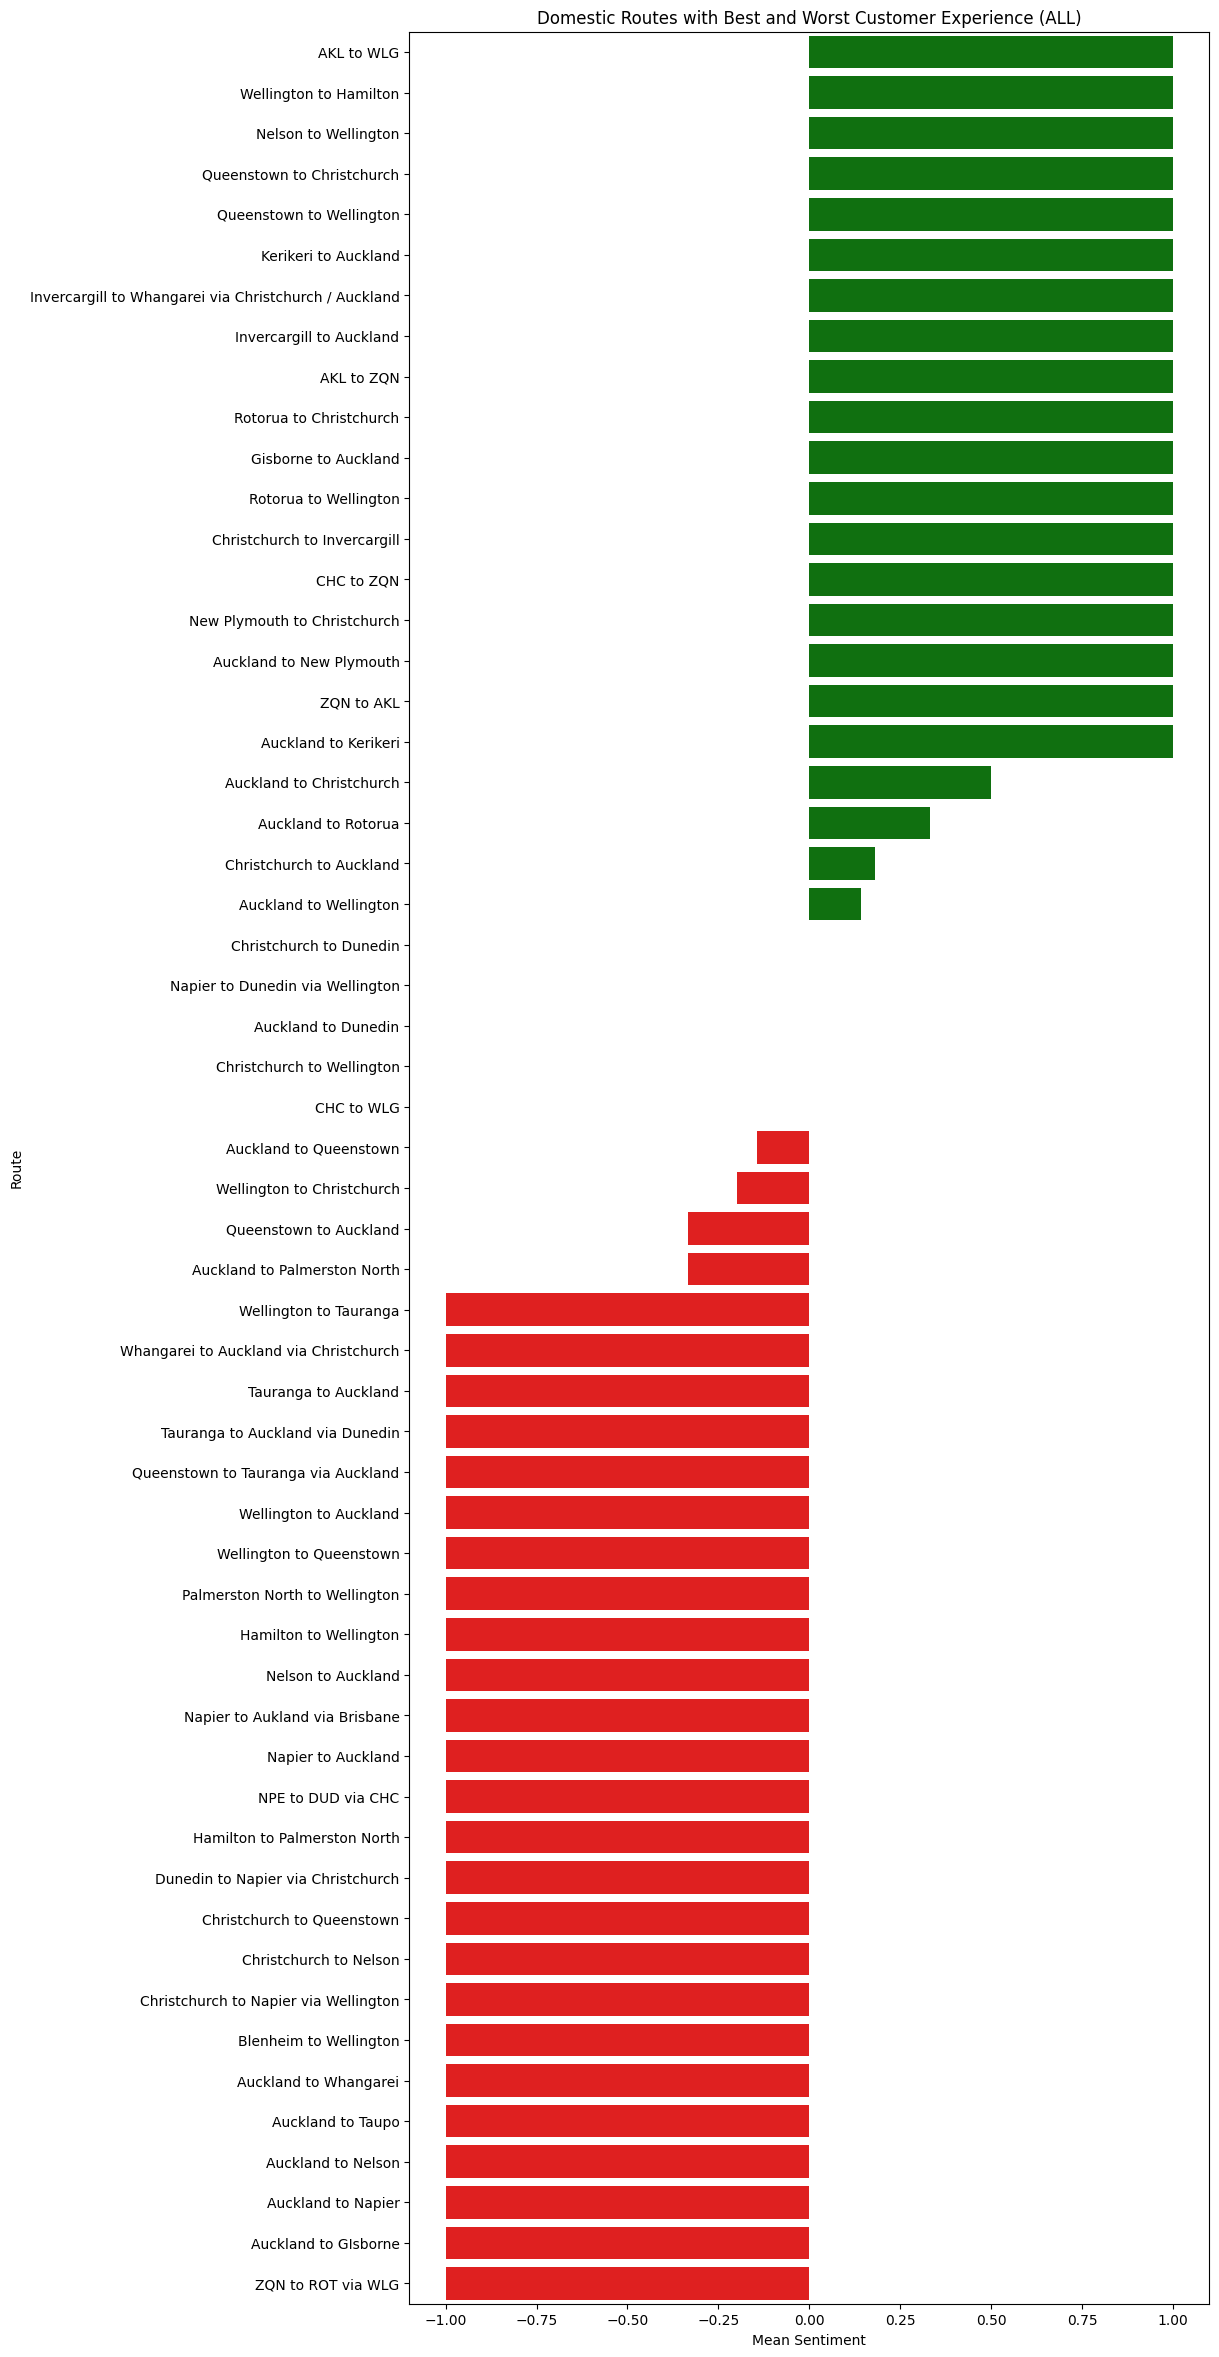

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_5360/9351290.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vader_sentiment_numeric', y='route', data=international_mean_sentiment_sorted, palette=international_colors)


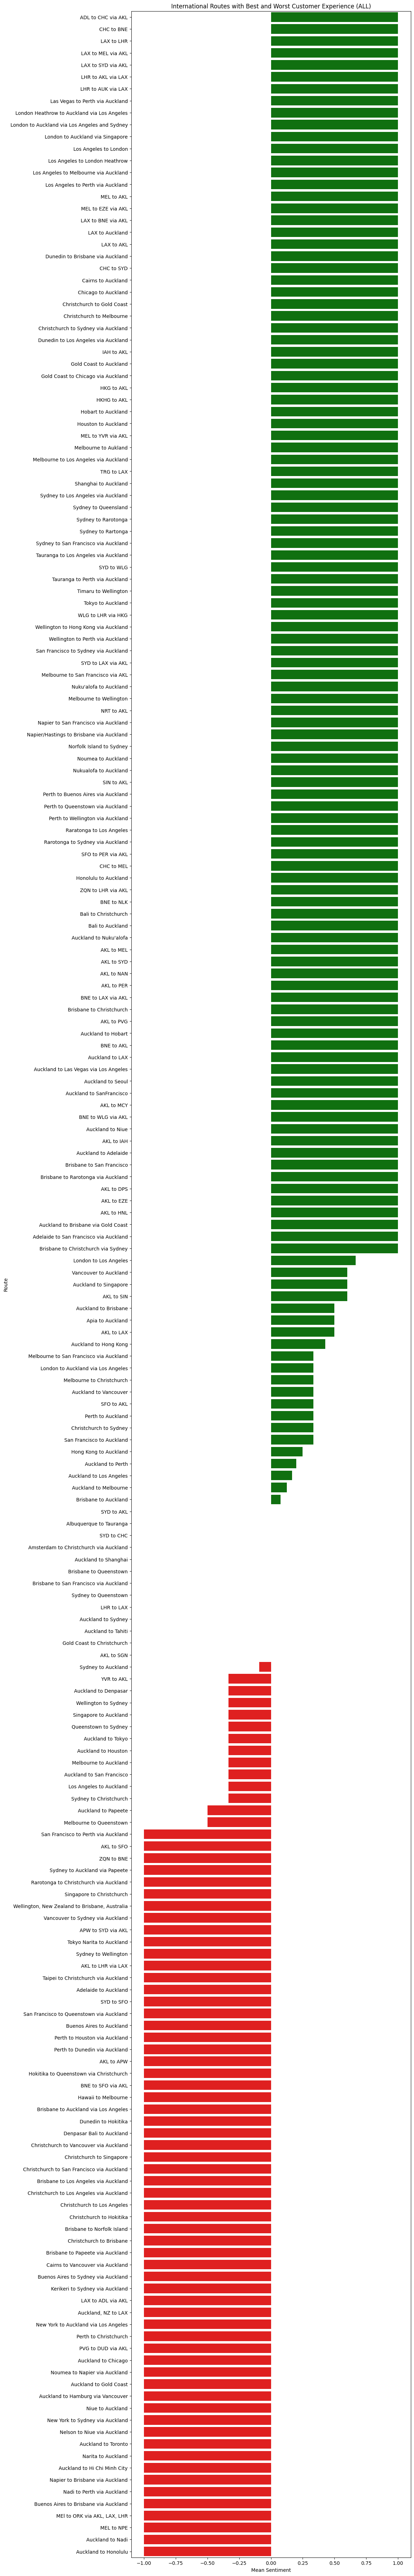

In [84]:
# Define a base height and scale factor
base_height = 6
height_per_route = 0.4  # Adjust this factor as needed

# Calculate the height based on the number of routes
num_routes_domestic = len(domestic_mean_sentiment_sorted)
num_routes_international = len(international_mean_sentiment_sorted)

fig_height_domestic = base_height + (num_routes_domestic * height_per_route)
fig_height_international = base_height + (num_routes_international * height_per_route)

# Plot domestic routes
plt.figure(figsize=(10, fig_height_domestic))
sns.barplot(x='vader_sentiment_numeric', y='route', data=domestic_mean_sentiment_sorted, palette=domestic_colors)
plt.title(f"Domestic Routes with Best and Worst Customer Experience ({chosen_year})")
plt.xlabel("Mean Sentiment")
plt.ylabel("Route")
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

# Plot international routes
plt.figure(figsize=(10, fig_height_international))
sns.barplot(x='vader_sentiment_numeric', y='route', data=international_mean_sentiment_sorted, palette=international_colors)
plt.title(f"International Routes with Best and Worst Customer Experience ({chosen_year})")
plt.xlabel("Mean Sentiment")
plt.ylabel("Route")
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()


# RESULTS:

In [85]:
# INTERPRETATION OF RESULTS: FLIGHT ROUTE SENTIMENT ANALYSIS

def interpret_route_sentiments(domestic_mean_sentiment_sorted, international_mean_sentiment_sorted, chosen_year):
    print(f"Customer Sentiment Analysis by Flight Route ({chosen_year})")

    # Domestic Routes Analysis
    print("\nDomestic Routes Analysis: ")
    
    highest_rated_domestic = domestic_mean_sentiment_sorted.iloc[0]
    lowest_rated_domestic = domestic_mean_sentiment_sorted.iloc[-1]

    print(f"- Highest Rated Domestic Route: {highest_rated_domestic['route']} with a mean sentiment score of {highest_rated_domestic['vader_sentiment_numeric']:.2f}.")
    print(f"  This route is receiving the most positive feedback from customers, suggesting a strong overall experience.")

    print(f"- Lowest Rated Domestic Route: {lowest_rated_domestic['route']} with a mean sentiment score of {lowest_rated_domestic['vader_sentiment_numeric']:.2f}.")
    print(f"  This route has the lowest average sentiment score, indicating areas where customer experience may be lacking. Further investigation is needed to identify specific issues.")

    # International Routes Analysis
    print("\nInternational Routes Analysis: ")
    
    highest_rated_international = international_mean_sentiment_sorted.iloc[0]
    lowest_rated_international = international_mean_sentiment_sorted.iloc[-1]

    print(f"- Highest Rated International Route: {highest_rated_international['route']} with a mean sentiment score of {highest_rated_international['vader_sentiment_numeric']:.2f}.")
    print(f"  This route is performing well in terms of customer satisfaction, showcasing effective service delivery.")

    print(f"- Lowest Rated International Route: {lowest_rated_international['route']} with a mean sentiment score of {lowest_rated_international['vader_sentiment_numeric']:.2f}.")
    print(f"  This route's low sentiment score highlights potential service issues that need to be addressed to improve customer satisfaction.")

    # Comparative Insights
    print("\nComparative Insights: ")
    
    avg_domestic_sentiment = domestic_mean_sentiment_sorted['vader_sentiment_numeric'].mean()
    avg_international_sentiment = international_mean_sentiment_sorted['vader_sentiment_numeric'].mean()

    print(f"- Average Sentiment Comparison: ")
    print(f"  - Average domestic route sentiment: {avg_domestic_sentiment:.2f}")
    print(f"  - Average international route sentiment: {avg_international_sentiment:.2f}")

    if avg_domestic_sentiment > avg_international_sentiment:
        print("  Domestic routes generally have higher sentiment scores compared to international routes. This could suggest that domestic customers are more satisfied, or that international routes face unique challenges.")

    elif avg_domestic_sentiment < avg_international_sentiment:
        print("  International routes generally have higher sentiment scores compared to domestic routes. This might indicate better service or higher satisfaction levels on international flights.")

    # Recommendations
    print("\nRecommendations: ")

    # Recommendations for highest-rated routes
    print(f"- For High-Performing Routes: ")
    print(f"  - For domestic route {highest_rated_domestic['route']}, and international route {highest_rated_international['route']}, continue to maintain and enhance the features contributing to their high satisfaction. Consider using these routes as benchmarks for other routes.")

    # Recommendations for lowest-rated routes
    print(f"- For Low-Performing Routes: ")
    print(f"  - For domestic route {lowest_rated_domestic['route']}, and international route {lowest_rated_international['route']}, investigate the specific issues leading to low satisfaction scores. Address these issues through targeted improvements in service, comfort, or efficiency.")

    # Recommendations based on comparison
    if avg_domestic_sentiment < avg_international_sentiment:
        print("- General Recommendation: Since international routes have higher average sentiment scores, consider analyzing successful strategies on international routes and applying similar improvements to domestic routes.")

# Call the interpretation function to analyze the results
interpret_route_sentiments(domestic_mean_sentiment_sorted, international_mean_sentiment_sorted, chosen_year)


Customer Sentiment Analysis by Flight Route (ALL)

Domestic Routes Analysis: 
- Highest Rated Domestic Route: AKL to WLG with a mean sentiment score of 1.00.
  This route is receiving the most positive feedback from customers, suggesting a strong overall experience.
- Lowest Rated Domestic Route: ZQN to ROT via WLG with a mean sentiment score of -1.00.
  This route has the lowest average sentiment score, indicating areas where customer experience may be lacking. Further investigation is needed to identify specific issues.

International Routes Analysis: 
- Highest Rated International Route: ADL to CHC via AKL with a mean sentiment score of 1.00.
  This route is performing well in terms of customer satisfaction, showcasing effective service delivery.
- Lowest Rated International Route: Auckland to Honolulu with a mean sentiment score of -1.00.
  This route's low sentiment score highlights potential service issues that need to be addressed to improve customer satisfaction.

Comparative I

# FEATURE IMPORTANCE ANALYSIS

# Identify which factors most influence customer sentiment in Air NZ reviews?

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Define the features and target (assuming 'vader_sentiment_numeric' is multiclass)
features = year_reviews[['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 
                         'ground_service', 'value_for_money', 'inflight_entertainment', 
                         'wifi_&_connectivity']]
target = year_reviews['vader_sentiment_numeric']



In [88]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test set for Decision Tree
dt_y_pred = dt_clf.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Results:")
print(classification_report(y_test, dt_y_pred))
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy}")


Decision Tree Results:
              precision    recall  f1-score   support

        -1.0       0.60      0.61      0.60        74
         0.0       0.00      0.00      0.00         3
         1.0       0.72      0.69      0.70        91

    accuracy                           0.64       168
   macro avg       0.44      0.43      0.44       168
weighted avg       0.65      0.64      0.65       168

Accuracy: 0.6428571428571429


In [89]:
# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set for Random Forest
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_y_pred))
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy}")


Random Forest Results:
              precision    recall  f1-score   support

        -1.0       0.63      0.82      0.71        74
         0.0       0.00      0.00      0.00         3
         1.0       0.80      0.63      0.70        91

    accuracy                           0.70       168
   macro avg       0.48      0.48      0.47       168
weighted avg       0.71      0.70      0.70       168

Accuracy: 0.7023809523809523


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

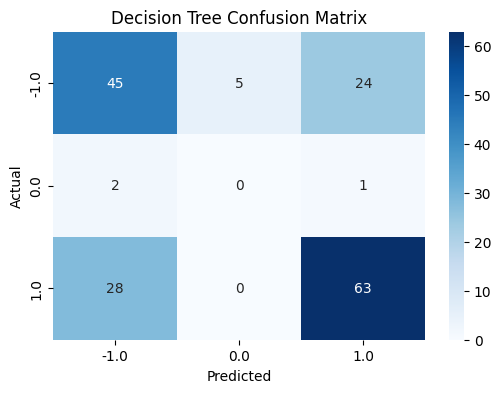

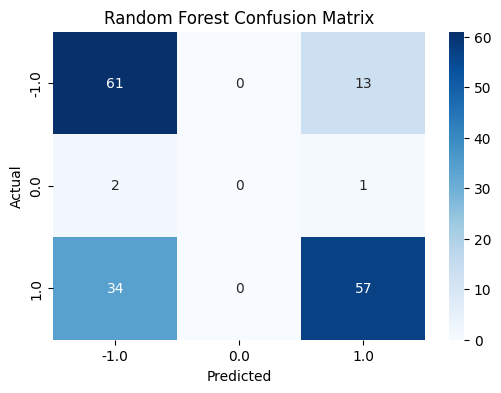

In [90]:
# Confusion matrix for Decision Tree (handling multiclass)
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(target.unique()), yticklabels=sorted(target.unique()))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Random Forest (handling multiclass)
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(target.unique()), yticklabels=sorted(target.unique()))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
# Determine which model has higher accuracy
if rf_accuracy > dt_accuracy:
    print("Random Forest has higher accuracy. Generating feature importance...")
    # Feature importance for Random Forest
    feature_importances = rf_clf.feature_importances_
    model_name = "Random Forest"
else:
    print("Decision Tree has higher accuracy. Generating feature importance...")
    # Feature importance for Decision Tree
    feature_importances = dt_clf.feature_importances_
    model_name = "Decision Tree"



Random Forest has higher accuracy. Generating feature importance...


In [92]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
4,value_for_money,0.218185
1,cabin_staff_service,0.177022
3,ground_service,0.173857
2,food_&_beverages,0.124450
5,inflight_entertainment,0.116025
0,seat_comfort,0.115109
6,wifi_&_connectivity,0.075352


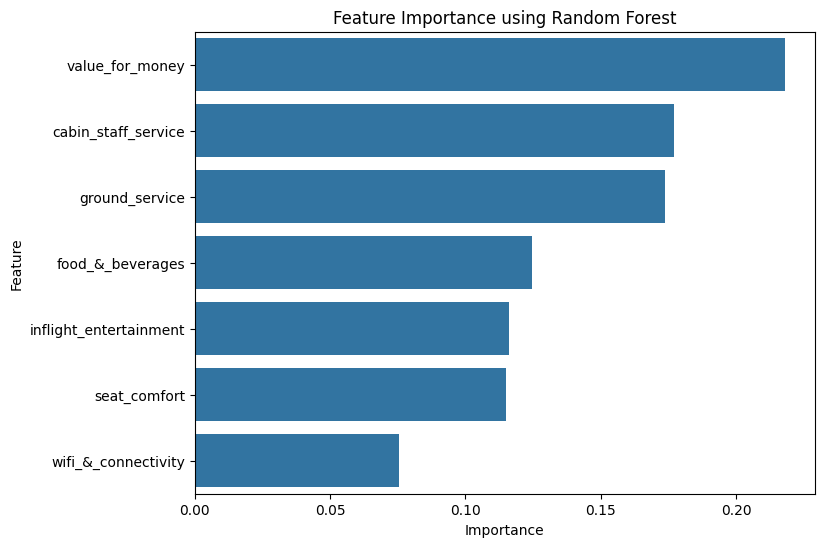

In [93]:
# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title(f'Feature Importance using {model_name}')
plt.show()

In [94]:
# Interpret the results and provide an analytical breakdown
def interpret_results(dt_accuracy, rf_accuracy, importance_df, model_name):
    """
    Function to interpret the results of Decision Tree and Random Forest models 
    and provide an analytical breakdown with actionable insights.
    
    Parameters:
    dt_accuracy (float): Accuracy of the Decision Tree model.
    rf_accuracy (float): Accuracy of the Random Forest model.
    importance_df (DataFrame): DataFrame containing feature importance scores.
    model_name (str): Name of the model used for the feature importance analysis.
    """
    
    # Model performance comparison
    print("### Model Comparison and Performance Analysis ###\n")
    
    if rf_accuracy > dt_accuracy:
        print(f"The Random Forest model outperforms the Decision Tree model with an accuracy of {rf_accuracy:.2f}, "
              f"compared to {dt_accuracy:.2f}.")
        print("\n#### Why Random Forest performed better: ####\n"
              "- It combines the predictions of multiple trees, making it more robust and less prone to overfitting.\n"
              "- It handles the complexity of multiclass sentiment classification better by averaging many decision trees.\n"
              "- The ensemble nature improves generalization, especially for complex datasets like multiclass sentiment.")
    else:
        print(f"The Decision Tree model performs slightly better than the Random Forest with an accuracy of {dt_accuracy:.2f}, "
              f"compared to {rf_accuracy:.2f}.")
        print("\n#### Why Decision Tree performed better: ####\n"
              "- Simplicity and faster training time might have worked better on this dataset.\n"
              "- It provides easier interpretability, allowing you to track specific decision paths, which can be insightful for smaller datasets.")
    
    # Feature importance analysis
    print("\n### In-Depth Feature Importance Analysis ###\n")
    print(f"Feature importance for the {model_name} model, highlighting the top factors influencing sentiment:")

    top_features = importance_df.head(7)  # Display all 7 most important features

    # Sort the top_features by the 'Importance' column in descending order
    sorted_features = top_features.sort_values(by='Importance', ascending=False)
    
    # Loop through the top features and provide detailed insights on their importance
    for rank, (idx, row) in enumerate(sorted_features.iterrows(), 1):  # Adjust rank to reflect sorted order
        importance_score = row['Importance']
        
        # Classify importance into high, moderate, or low based on value thresholds
        if importance_score >= 0.20:
            impact_level = "high impact"
        elif 0.10 <= importance_score < 0.20:
            impact_level = "moderate impact"
        else:
            impact_level = "low impact"
        
        # Print the ranked features with their importance scores and impact level
        print(f"Rank {rank}: {row['Feature']} has an importance score of {importance_score:.2f}, "
              f"indicating a {impact_level} on passenger sentiment.")

    important_features = sorted_features['Feature'].values

    # Specific insights for each feature
    if 'seat_comfort' in important_features:
        print("- Seat Comfort: Passengers highly value seat comfort, especially on long-haul flights. Improving seat ergonomics or offering more space can directly influence positive sentiment.")
    
    if 'cabin_staff_service' in important_features:
        print("- Cabin Staff Service: This is critical to customer experience. Exceptional service can greatly enhance the perception of the airline, even compensating for minor inconveniences during the flight.")
    
    if 'food_&_beverages' in important_features:
        print("- Food & Beverages: The quality and variety of meals provided onboard contribute significantly to passenger satisfaction. Offering more dietary options or improving meal quality could enhance positive feedback.")
    
    if 'ground_service' in important_features:
        print("- Ground Service: Efficient and friendly service at the airport (check-in, boarding, etc.) sets the tone for the flight experience. Long wait times or poor ground service can negatively impact overall sentiment.")
    
    if 'value_for_money' in important_features:
        print("- Value for Money: Passengers expect the ticket price to be justified by the quality of services. Enhancing value through amenities or competitive pricing can improve customer perceptions.")
    
    if 'inflight_entertainment' in important_features:
        print("- Inflight Entertainment: Offering diverse and modern entertainment options is crucial for long flights. Expanding movie choices, games, or other interactive content could positively impact passenger sentiment.")
    
    if 'wifi_&_connectivity' in important_features:
        print("- Wi-Fi & Connectivity: In the age of constant connectivity, reliable and fast Wi-Fi is increasingly important, especially for business travelers. Improving connectivity can enhance satisfaction.")

    # Actionable recommendations based on the analysis
    print("\n### Actionable Recommendations ###\n")

    if 'seat_comfort' in important_features:
        print("- Upgrade Seat Comfort: Consider more comfortable seating options, especially for long-haul routes or premium classes, to improve customer satisfaction.")
    
    if 'cabin_staff_service' in important_features:
        print("- Enhance Cabin Crew Training: Cabin staff service plays a huge role in customer sentiment. Ongoing training in customer engagement, empathy, and service efficiency could boost positive feedback.")
    
    if 'food_&_beverages' in important_features:
        print("- Improve Meal Quality and Variety: Introducing more meal options, catering to dietary needs, or enhancing overall quality could significantly improve passenger experience.")
    
    if 'ground_service' in important_features:
        print("- Optimize Ground Service Efficiency: Improving check-in and boarding processes or reducing waiting times at airports can positively influence sentiment before passengers even board.")
    
    if 'value_for_money' in important_features:
        print("- Reevaluate Pricing Strategies: Offering added value through extras (e.g., free Wi-Fi, complimentary meals) or reevaluating fare structures can enhance passengers' perception of value for money.")
    
    if 'inflight_entertainment' in important_features:
        print("- Expand Inflight Entertainment Options: Providing a broader selection of movies, TV shows, and interactive games can enrich the onboard experience, particularly on long-haul flights.")
    
    if 'wifi_&_connectivity' in important_features:
        print("- Improve Wi-Fi Services: Enhancing internet speed and connectivity reliability will likely result in higher satisfaction, especially for business passengers needing constant access to online services.")

  
# Call the interpretation function with accuracy and feature importance
interpret_results(dt_accuracy, rf_accuracy, importance_df, model_name)


### Model Comparison and Performance Analysis ###

The Random Forest model outperforms the Decision Tree model with an accuracy of 0.70, compared to 0.64.

#### Why Random Forest performed better: ####
- It combines the predictions of multiple trees, making it more robust and less prone to overfitting.
- It handles the complexity of multiclass sentiment classification better by averaging many decision trees.
- The ensemble nature improves generalization, especially for complex datasets like multiclass sentiment.

### In-Depth Feature Importance Analysis ###

Feature importance for the Random Forest model, highlighting the top factors influencing sentiment:
Rank 1: value_for_money has an importance score of 0.22, indicating a high impact on passenger sentiment.
Rank 2: cabin_staff_service has an importance score of 0.18, indicating a moderate impact on passenger sentiment.
Rank 3: ground_service has an importance score of 0.17, indicating a moderate impact on passenger sentiment.
Rank 4

In [95]:
dt_accuracy

0.6428571428571429

In [96]:
rf_accuracy

0.7023809523809523

In [97]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
